
# Internet Speed Analysis Project

This project aims to analyze internet speed metrics across regions and countries, providing insights through visualizations and an interactive dashboard.

### Project Overview
- **Data Loading and Cleaning**: Load datasets, handle missing values, and preprocess data.
- **Exploratory Data Analysis (EDA)**: Explore trends in internet performance metrics like download/upload speeds and latency.
- **Geospatial Mapping**: Visualize performance metrics on geographical maps.
- **Comparative Analysis**: Compare internet speeds across countries and connection types (fixed vs. mobile).
- **Interactive Dashboard**: Build an interactive dashboard for dynamic exploration of the data.
- **Insights and Recommendations**: Summarize findings and actionable insights.

---



## 1. Data Loading

In this section, we load the datasets required for analysis, including:
- **Fixed Tiles Data**: Internet performance metrics for fixed connections.
- **Mobile Tiles Data**: Internet performance metrics for mobile connections.
- **GPS Tiles**: Geospatial data for mapping internet speeds.
- **Mobile Summary Data**: Regional-level summary metrics for mobile internet.

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [ ]:
# Define file paths
base_path = '/content/drive/MyDrive/data analysis'
fixed_tiles = pd.read_parquet(f"{base_path}/2024-04-01_performance_fixed_tiles.parquet")
mobile_tiles = pd.read_parquet(f"{base_path}/2024-04-01_performance_mobile_tiles.parquet")
mobile_data = pd.read_csv(f"{base_path}/mobile_year_2022_quarter_03.csv")

# Display dataset shapes
print("Fixed Tiles Shape:", fixed_tiles.shape)
print("Mobile Tiles Shape:", mobile_tiles.shape)
print("Mobile Data Shape:", mobile_data.shape)

Fixed Tiles Shape: (6492072, 11)
Mobile Tiles Shape: (3703161, 11)
Mobile Data Shape: (233, 11)



## 2. Data Cleaning

Data cleaning is essential to handle missing values and ensure consistency in the datasets. Here, we:
1. Check for missing values in key columns.
2. Perform median imputation for missing latency metrics (`avg_lat_down_ms` and `avg_lat_up_ms`).

---


In [ ]:
# Check missing values before cleaning
print("Missing Values (Fixed Tiles):\n", fixed_tiles.isnull().sum())
print("\nMissing Values (Mobile Tiles):\n", mobile_tiles.isnull().sum())

# Perform median imputation for missing values
fixed_tiles['avg_lat_down_ms'].fillna(fixed_tiles['avg_lat_down_ms'].median(), inplace=True)
fixed_tiles['avg_lat_up_ms'].fillna(fixed_tiles['avg_lat_up_ms'].median(), inplace=True)
mobile_tiles['avg_lat_down_ms'].fillna(mobile_tiles['avg_lat_down_ms'].median(), inplace=True)
mobile_tiles['avg_lat_up_ms'].fillna(mobile_tiles['avg_lat_up_ms'].median(), inplace=True)

# Check missing values after cleaning
print("\nMissing Values After Cleaning (Fixed Tiles):\n", fixed_tiles.isnull().sum())
print("\nMissing Values After Cleaning (Mobile Tiles):\n", mobile_tiles.isnull().sum())


Missing Values (Fixed Tiles):
 quadkey                0
tile                   0
tile_x                 0
tile_y                 0
avg_d_kbps             0
avg_u_kbps             0
avg_lat_ms             0
avg_lat_down_ms    86400
avg_lat_up_ms      82533
tests                  0
devices                0
dtype: int64

Missing Values (Mobile Tiles):
 quadkey                 0
tile                    0
tile_x                  0
tile_y                  0
avg_d_kbps              0
avg_u_kbps              0
avg_lat_ms              0
avg_lat_down_ms    115366
avg_lat_up_ms       75456
tests                   0
devices                 0
dtype: int64


<ipython-input-5-b428f1f54058>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fixed_tiles['avg_lat_down_ms'].fillna(fixed_tiles['avg_lat_down_ms'].median(), inplace=True)
<ipython-input-5-b428f1f54058>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c


Missing Values After Cleaning (Fixed Tiles):
 quadkey            0
tile               0
tile_x             0
tile_y             0
avg_d_kbps         0
avg_u_kbps         0
avg_lat_ms         0
avg_lat_down_ms    0
avg_lat_up_ms      0
tests              0
devices            0
dtype: int64

Missing Values After Cleaning (Mobile Tiles):
 quadkey            0
tile               0
tile_x             0
tile_y             0
avg_d_kbps         0
avg_u_kbps         0
avg_lat_ms         0
avg_lat_down_ms    0
avg_lat_up_ms      0
tests              0
devices            0
dtype: int64



## 3. Exploratory Data Analysis (EDA)

This section explores key metrics to understand trends and distributions:
- **Download Speeds**: Distribution of average download speeds for fixed and mobile connections.
- **Comparative Analysis**: Compare average download and upload speeds across connection types.

---


In [ ]:
print(mobile_data.columns)

Index(['Country', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms'], dtype='object')


In [ ]:
import plotly.express as px

mobile_data['avg_d_kbps'] = pd.to_numeric(mobile_data['avg_d_kbps'], errors='coerce')
mobile_data_cleaned = mobile_data.dropna(subset=['avg_d_kbps'])
mobile_data_grouped = mobile_data_cleaned.groupby('Country').mean(numeric_only=True)
mobile_data_grouped = mobile_data_grouped.sort_values(by='avg_d_kbps', ascending=False).head(5)

# --- Bar Chart ---
fig_bar = px.bar(
    mobile_data_grouped,
    x=mobile_data_grouped.index,
    y='avg_d_kbps',
    title='Top 5 Countries by Average Download Speeds (Bar Chart)',
    labels={'x': 'Country', 'avg_d_kbps': 'Average Download Speed (kbps)'},
    text_auto=True
)
fig_bar.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title="Country",
    yaxis_title="Average Download Speed (kbps)",
    title_x=0.5,
    height=600,
    template="plotly_white"
)
fig_bar.show()

# --- Pie Chart ---
fig_pie = px.pie(
    mobile_data_grouped,
    names=mobile_data_grouped.index,
    values='avg_d_kbps',
    title='Download Speed Distribution of Top 5 Countries (Pie Chart)',
    template='plotly_white'
)
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

# --- TreeMap ---
fig_treemap = px.treemap(
    mobile_data_grouped,
    path=[mobile_data_grouped.index],
    values='avg_d_kbps',
    title='Download Speeds by Top 5 Countries (TreeMap)',
    color='avg_d_kbps',
    color_continuous_scale='Viridis',
    template='plotly_white'
)
fig_treemap.show()

# --- Line Chart ---
fig_line = px.line(
    mobile_data_grouped,
    x=mobile_data_grouped.index,
    y='avg_d_kbps',
    title='Trend of Download Speeds for Top 5 Countries (Line Chart)',
    labels={'x': 'Country', 'avg_d_kbps': 'Average Download Speed (kbps)'},
    template='plotly_white'
)
fig_line.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title="Country",
    yaxis_title="Average Download Speed (kbps)",
    title_x=0.5
)
fig_line.show()

# --- Scatter Plot ---
fig_scatter = px.scatter(
    mobile_data_grouped,
    x='avg_u_kbps',
    y='avg_d_kbps',
    size='avg_d_kbps',
    color=mobile_data_grouped.index,
    title='Download vs Upload Speeds for Top 5 Countries (Scatter Plot)',
    labels={
        "avg_u_kbps": "Average Upload Speed (kbps)",
        "avg_d_kbps": "Average Download Speed (kbps)",
        "Country": "Country"
    },
    template='plotly_white'
)
fig_scatter.update_layout(
    xaxis_title="Average Upload Speed (kbps)",
    yaxis_title="Average Download Speed (kbps)",
    title_x=0.5
)
fig_scatter.show()

# --- Histogram ---
fig_hist = px.histogram(
    mobile_data_cleaned[mobile_data_cleaned['Country'].isin(mobile_data_grouped.index)],
    x='avg_d_kbps',
    nbins=20,
    title='Distribution of Download Speeds for Top 5 Countries (Histogram)',
    labels={'x': 'Average Download Speed (kbps)'},
    template='plotly_white'
)
fig_hist.update_layout(
    xaxis_title="Average Download Speed (kbps)",
    yaxis_title="Frequency",
    title_x=0.5
)
fig_hist.show()


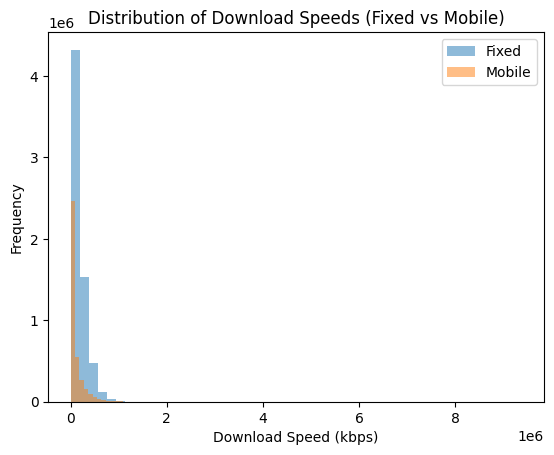

In [ ]:
# Plot distribution of download speeds for Fixed and Mobile connections
fixed_tiles['avg_d_kbps'].plot(kind='hist', alpha=0.5, bins=50, label='Fixed')
mobile_tiles['avg_d_kbps'].plot(kind='hist', alpha=0.5, bins=50, label='Mobile')
plt.title('Distribution of Download Speeds (Fixed vs Mobile)')
plt.xlabel('Download Speed (kbps)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



## 5. Country Comparisons

Compare internet speed metrics (download, upload, and latency) across countries using bar charts.

---


In [ ]:
import pandas as pd
import plotly.express as px


mobile_data['avg_d_kbps'] = pd.to_numeric(mobile_data['avg_d_kbps'], errors='coerce')

mobile_data_cleaned = mobile_data.dropna(subset=['avg_d_kbps'])

mobile_data_grouped = mobile_data_cleaned.groupby('Country').mean(numeric_only=True)

mobile_data_grouped = mobile_data_grouped.sort_values(by='avg_d_kbps', ascending=False)

fig_bar = px.bar(
    mobile_data_grouped,
    x=mobile_data_grouped.index,
    y='avg_d_kbps',
    title='Average Download Speeds by Country',
    labels={'x': 'Country', 'avg_d_kbps': 'Average Download Speed (kbps)'},
    text_auto=True  # Display speed values on bars
)

fig_bar.update_layout(
    xaxis={'tickangle': -45},  # Rotate x-axis labels for readability
    xaxis_title="Country",
    yaxis_title="Average Download Speed (kbps)",
    title_x=0.5,  # Center the title
    height=600,  # Adjust chart height as needed
    template="plotly_white"  # Use a clean white template
)
fig_bar.show()


## 6. Interactive Dashboard

Build an advanced interactive dashboard with dynamic visualizations for fixed and mobile internet metrics.

---


In [ ]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Internet Speed Dashboard", style={'textAlign': 'center'}),
    dcc.Tabs([
        dcc.Tab(label='Fixed Tiles Analysis', children=[
            dcc.Dropdown(
                id='fixed-feature',
                options=[
                    {'label': 'Download Speed', 'value': 'avg_d_kbps'},
                    {'label': 'Upload Speed', 'value': 'avg_u_kbps'},
                    {'label': 'Latency', 'value': 'avg_lat_ms'}
                ],
                value='avg_d_kbps'
            ),
            dcc.Graph(id='fixed-graph')
        ]),
        dcc.Tab(label='Mobile Tiles Analysis', children=[
            dcc.Dropdown(
                id='mobile-feature',
                options=[
                    {'label': 'Download Speed', 'value': 'avg_d_kbps'},
                    {'label': 'Upload Speed', 'value': 'avg_u_kbps'},
                    {'label': 'Latency', 'value': 'avg_lat_ms'}
                ],
                value='avg_d_kbps'
            ),
            dcc.Graph(id='mobile-graph')
        ])
    ])
])

@app.callback(
    Output('fixed-graph', 'figure'),
    Input('fixed-feature', 'value')
)
def update_fixed_graph(selected_feature):
    fig = px.histogram(fixed_tiles, x=selected_feature, title=f'Fixed Tiles: {selected_feature} Distribution')
    return fig

@app.callback(
    Output('mobile-graph', 'figure'),
    Input('mobile-feature', 'value')
)
def update_mobile_graph(selected_feature):
    fig = px.histogram(mobile_tiles, x=selected_feature, title=f'Mobile Tiles: {selected_feature} Distribution')
    return fig

if __name__ == '__main__':
    app.run_server(debug=False, port=8050)


<IPython.core.display.Javascript object>

In [ ]:
!pip install dash

from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

mobile_data = pd.DataFrame({
    "Country": ["USA", "Canada", "UK", "Germany", "France"],
    "avg_d_kbps": [1500, 1200, 1400, 1600, 1300],
    "avg_u_kbps": [700, 600, 650, 750, 720],
    "avg_lat_ms": [40, 35, 45, 30, 25]
})

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Internet Speed Dashboard", style={'textAlign': 'center'}),
    dcc.Tabs([
        dcc.Tab(label='Country Comparison', children=[
            html.Div([
                html.Label("Choose a Metric to Compare:"),
                dcc.Dropdown(
                    id='country-metric',
                    options=[
                        {'label': 'Download Speed', 'value': 'avg_d_kbps'},
                        {'label': 'Upload Speed', 'value': 'avg_u_kbps'},
                        {'label': 'Latency', 'value': 'avg_lat_ms'}
                    ],
                    value='avg_d_kbps'
                ),
                dcc.Graph(id='country-comparison-graph')
            ])
        ])
    ])
])


@app.callback(
    Output('country-comparison-graph', 'figure'),
    Input('country-metric', 'value')
)
def update_country_comparison(selected_metric):
    fig = px.bar(
        mobile_data,
        x='Country',
        y=selected_metric,
        color='Country',
        title=f"Comparison of {selected_metric} Across Countries",
        labels={selected_metric: "Metric Value", "Country": "Country"}
    )
    return fig

if __name__ == '__main__':
    app.run_server(debug=False, port=8050)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>